In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('food_orders_new_delhi.csv')
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,01/02/2024 1:11,01/02/2024 2:39,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,02/02/2024 22:11,02/02/2024 22:46,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,31/01/2024 5:54,31/01/2024 6:52,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,16/01/2024 22:52,16/01/2024 23:38,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,29/01/2024 1:19,29/01/2024 2:48,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [11]:
from datetime import datetime

# convert date and time columns to datetime format
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'], format='%d/%m/%Y %H:%M')
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'], format='%d/%m/%Y %H:%M')



In [12]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:00,2024-02-01 02:39:00,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:00,2024-01-27 00:36:00,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:00,2024-01-02 20:23:00,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:00,2024-01-05 02:10:00,491,40,Digital Wallet,10%,189,10,0


In [13]:
# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    discount_str = str(discount_str)  # Convert to string to avoid errors

    if 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        return float(discount_str.split('%')[0])
    else:
        return 0.0

In [14]:
# apply the function to create a new 'Discount Value' column
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [15]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:00,2024-02-01 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,NaN,146,27,0,0.0
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0


In [16]:
# for percentage discounts, calculate the discount amount based on the order value
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] /100)
                                if x['Discount Percentage'] > 1
                                else x['Discount Percentage' ], axis=1)

In [25]:
df.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:00,2024-02-01 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


In [38]:
print(df[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())

print(df.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00
Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [39]:
df.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:00,2024-02-01 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00
5,6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90
6,7,C1466,R2457,2024-01-12 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15
7,8,C5426,R2978,2024-01-26 22:46:00,2024-01-27 00:36:00,260,0,Credit Card,10%,55,19,0,10.0,26.00
8,9,C6578,R2877,2024-01-02 18:29:00,2024-01-02 20:23:00,1663,40,Cash on Delivery,5% on App,116,48,0,5.0,83.15
9,10,C9322,R2161,2024-01-05 00:50:00,2024-01-05 02:10:00,491,40,Digital Wallet,10%,189,10,0,10.0,49.10


In [43]:
# calculate total costs and revenue per order
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']



In [45]:
df.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:00,2024-02-01 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00


In [49]:
# aggregate data to get overall metrics
total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

overall_metrica = {
    "Total Orders" : total_orders,
    "Total Revenue" : total_revenue,
    "Total Costs" : total_costs,
    "Total Profit" : total_profit
}

In [50]:
print(overall_metrica)


{'Total Orders': 1000, 'Total Revenue': np.int64(126990), 'Total Costs': np.float64(232709.85), 'Total Profit': np.float64(-105719.85)}


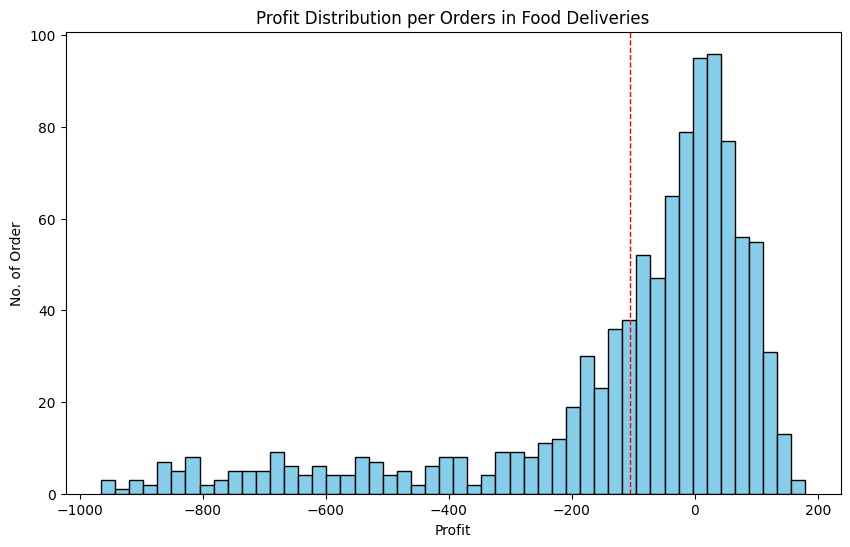

In [51]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10,6))
plt.hist(df['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Orders in Food Deliveries')
plt.xlabel('Profit')
plt.ylabel('No. of Order')
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

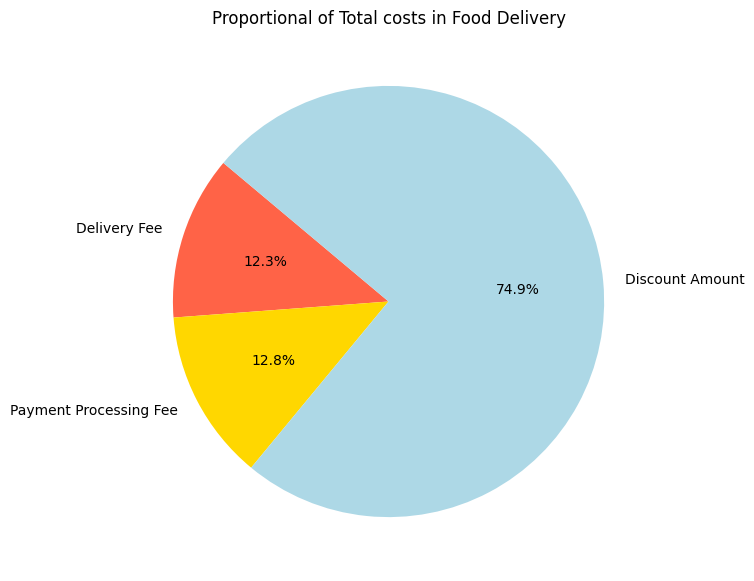

In [54]:
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()

plt.figure(figsize=(7,7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportional of Total costs in Food Delivery')
plt.show()

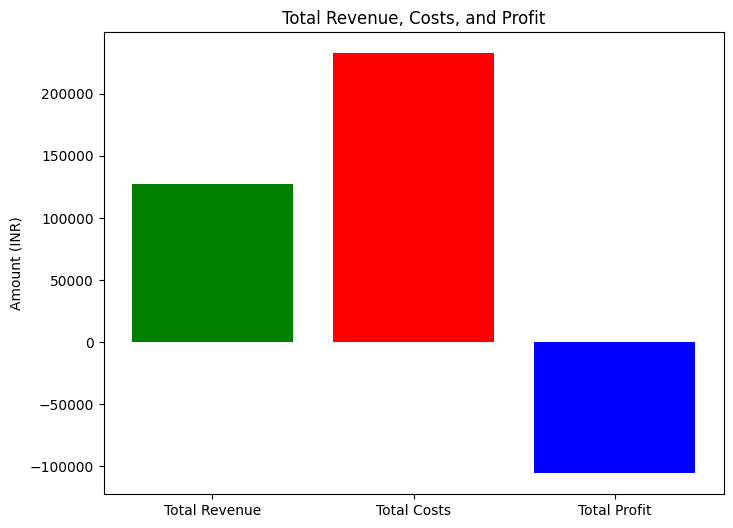

In [55]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

# A New Strategy for Profits


In [58]:
# filter the dataset for profitable orders
profitable_orders = df[df["Profit"] > 0]
profitable_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:00,2024-02-01 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00,77.00,146,69.00
5,6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,7,C1466,R2457,2024-01-12 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85


In [62]:
# calculate the average commission percentage for profitable orders
profitable_orders.loc[:, "Commission Percentage"] = (profitable_orders["Commission Fee"] / profitable_orders["Order Value"]) * 100

# calculate the average discount percentage for profitable orders
profitable_orders.loc[:, "Effective Discount Percentage"] = (profitable_orders["Discount Amount"] / profitable_orders["Order Value"]) * 100

In [65]:
# calculate the new averages
new_avg_commission_percentage = profitable_orders["Commission Percentage"].mean()
new_avg_discount_percentage = profitable_orders["Effective Discount Percentage"].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


In [66]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0
recommended_discount_percentage = 6.0

# calculate the simulated commission fee and discount amount using recommended percentages
df["simulated_commission_fee"] = df["Order Value"] * (recommended_commission_percentage / 100)
df["simulated_discount_amount"] = df["Order Value"] * (recommended_discount_percentage / 100)

In [68]:
# recalculate total costs and profit with simulated values
df["Simulated Total Costs"] = (df["Delivery Fee"] + df["Payment Processing Fee"] + df["simulated_discount_amount"])

df["Simulated Profit"] = (df["simulated_commission_fee"] - df["Simulated Total Costs"])

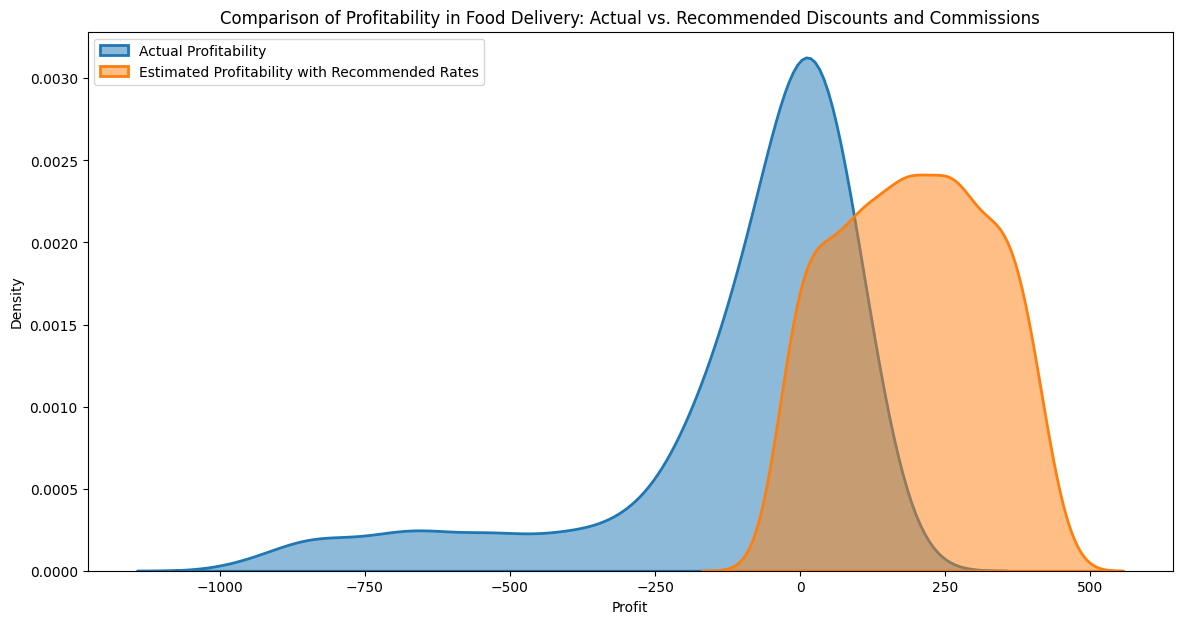

In [81]:
# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)


plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

## THE RECOMMENDED RATES ARE PROFITABLE THAN THE ACTUAL PROFIT